In [1]:
pip install opencv-python

In [3]:
import cv2

In [4]:
print(cv2.__version__)

4.11.0


In [5]:
import os
print(os.getcwd())  # Sprawdza bieżący katalog
print(os.listdir())  # Wyświetla pliki w katalogu

c:\PRACA\IT\TABLICA\sample jpg\OpenCV_Scikit-image
['.git', 'OpenCV_SKI.ipynb', 'README.md', 'sample.jpg']


In [6]:
obraz = cv2.imread("sample.jpg")
if obraz is None:
    print("Błąd: Nie udało się wczytać obrazu!")
else:
    print("Obraz wczytany poprawnie!")

Obraz wczytany poprawnie!


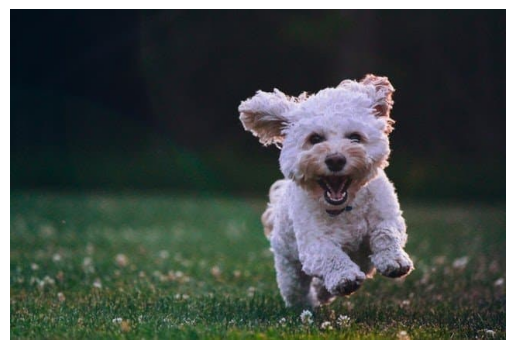

In [9]:
import cv2
import matplotlib.pyplot as plt

%matplotlib inline

sciezka = r"C:\PRACA\IT\TABLICA\sample jpg\OpenCV_Scikit-image\sample.jpg"
obraz = cv2.imread(sciezka)

# Konwersja BGR → RGB 
obraz = cv2.cvtColor(obraz, cv2.COLOR_BGR2RGB)

# Wyświetlenie obrazu
plt.imshow(obraz)
plt.axis("off")
plt.show()

Konwersja obrazu do skali szarości

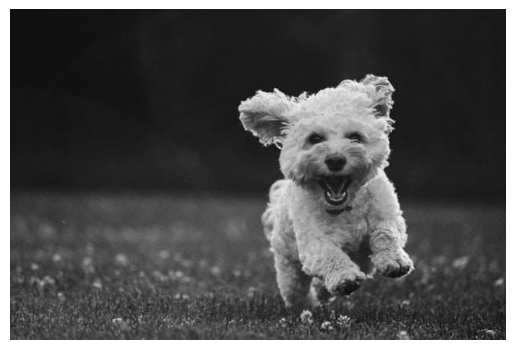

In [10]:
obraz_szary = cv2.cvtColor(obraz, cv2.COLOR_BGR2GRAY)

plt.imshow(obraz_szary, cmap="gray")
plt.axis("off")
plt.show()

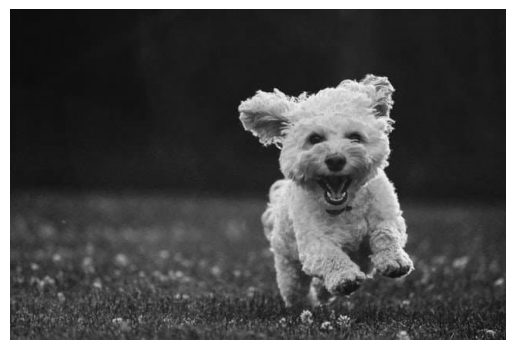

In [11]:
import numpy as np

obraz_szary_manual = np.mean(obraz, axis=2)

plt.imshow(obraz_szary_manual, cmap="gray")
plt.axis("off")
plt.show()

Wykrywanie krawędzi metodą Canny’ego:

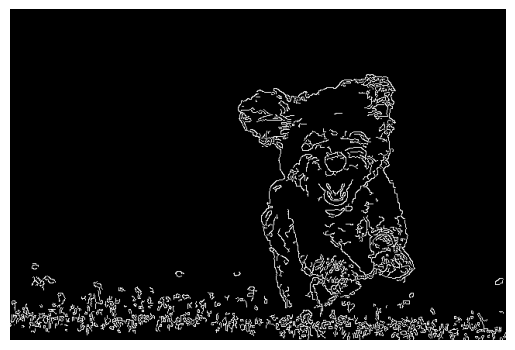

In [16]:
edges = cv2.Canny(obraz_szary, 100, 200)
plt.imshow(edges, cmap="gray")
plt.axis("off")
plt.show()

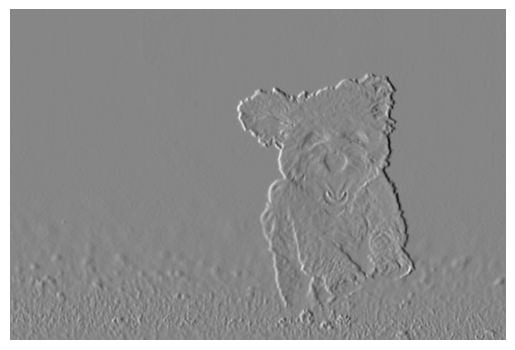

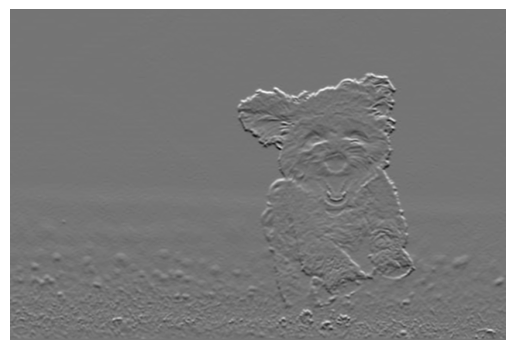

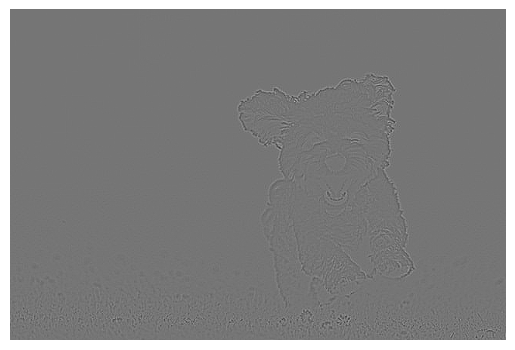

In [27]:
sobel_x = cv2.Sobel(obraz_szary, cv2.CV_64F, 1, 0, ksize=5)  # Gradient w poziomie
sobel_y = cv2.Sobel(obraz_szary, cv2.CV_64F, 0, 1, ksize=5)  # Gradient w pionie
plt.imshow(sobel_x, cmap="gray")
plt.axis("off")
plt.show()
plt.imshow(sobel_y, cmap="gray")
plt.axis("off")
plt.show()

laplacian = cv2.Laplacian(obraz_szary, cv2.CV_64F)
plt.imshow(laplacian, cmap="gray")
plt.axis("off")
plt.show()

Filtr Gaussa do redukcji szumu:

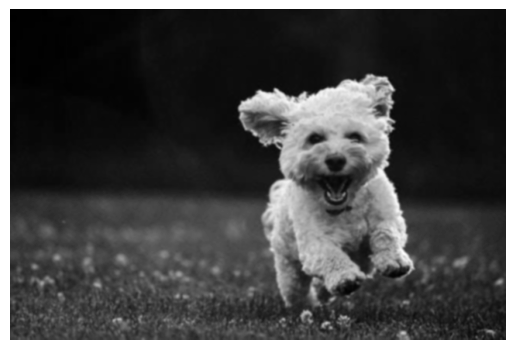

In [20]:
blur = cv2.GaussianBlur(obraz_szary, (5,5), 0)
plt.imshow(blur, cmap="gray")
plt.axis("off")
plt.show()